In [1]:
#%matplotlib nbagg
import broadbean as bb
import numpy as np
from broadbean.plotting import plotter
from sequencebuilder.sequence_builder import SequenceBuilder
from sequencebuilder.awg_controller import AWGController
from sequencebuilder.spinbuilder import spin_funnel_seq
ramp = bb.PulseAtoms.ramp

In [2]:
t = 1e-6
eta1 = np.linspace(-1, 0, num=3, endpoint=True)
eta2 = np.linspace(0, 0.5, num=3, endpoint=True)
a1 = (0,1,t)
a2 = (1,1,t)
a3 = (2,3,t)
eta = (eta1, eta2,t)
readout = (2,2,t)
a5 = (0,0,t)
a6 = (-1,0,t)
seq = spin_funnel_seq(a1, a2, a3, eta, readout, a5, a6)

1e-06
2e-06
3e-06
4e-06
4.9999999999999996e-06
5.999999999999999e-06
6.999999999999999e-06
hep
1e-06
2e-06
3e-06
4e-06
4.9999999999999996e-06
5.999999999999999e-06
6.999999999999999e-06
hep
1e-06
2e-06
3e-06
4e-06
4.9999999999999996e-06
5.999999999999999e-06
6.999999999999999e-06
hep
1e-06
2e-06
3e-06
4e-06
4.9999999999999996e-06
5.999999999999999e-06
6.999999999999999e-06
hep
1e-06
2e-06
3e-06
4e-06
4.9999999999999996e-06
5.999999999999999e-06
6.999999999999999e-06
hep
1e-06
2e-06
3e-06
4e-06
4.9999999999999996e-06
5.999999999999999e-06
6.999999999999999e-06
hep


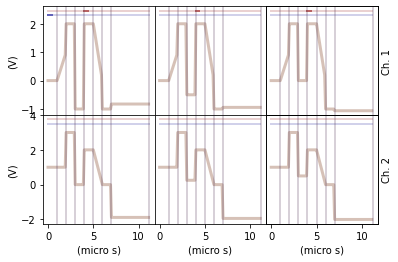

In [3]:
plotter(seq)

In [ ]:
def spin_funnel_blue_print(a1, a2, a3, eta, readout, a5, a6):
    bp = bb.BluePrint()
    bp.insertSegment(0, ramp, (a1[0], a1[0]), name='aa', dur=a1[1])
    bp.insertSegment(1, ramp, (a1[0], a2[0]), name='ab', dur=a2[1])
    bp.insertSegment(2, ramp, (a3[0], a3[0]), name='ac', dur=a3[1])
    bp.insertSegment(3, ramp, (eta[0], eta[0]), name='eta', dur=eta[1])
    bp.insertSegment(4, ramp, (readout[0], readout[0]), name='readout', dur=readout[1])
    bp.insertSegment(5, ramp, (readout[0], a5[0]), name='ad', dur=a5[1])
    bp.insertSegment(6, ramp, (a6[0], a6[0]), name='ae', dur=a6[1])
    return bp

In [ ]:
print(seq)

In [ ]:
t = 1e-6
bp = spin_funnel_blue_print((0,t), (1,0.5*t), (1,1*t), (-1,1*t), (1,2*t), (1,0.3*t), (2,2*t))

In [ ]:
bp.setSR(1e7)
plotter(bp)

In [ ]:
bp.description

In [ ]:
seq = bb.Sequence()
etarange = -1*np.arange(0,1,0.33)
for i, eta in enumerate(etarange):
    elem = bb.Element()
    print(eta)
    bp = spin_funnel_blue_print((0,t), (1,0.5*t), (1,1*t), (eta,1*t), (1,2*t), (1,0.3*t), (2,2*t))
    bp2 = spin_funnel_blue_print((0,t), (1,0.5*t), (1,1*t), (-0.5*eta,1*t), (1,2*t), (1,0.3*t), (2,2*t))
    bp.setSR(1e7)
    bp2.setSR(1e7)
    elem.addBluePrint(1, bp)
    elem.addBluePrint(2, bp2)
    seq.addElement(i+1, elem)

In [ ]:
elem.description['{}'.format(elem.channels[0])]

In [ ]:
elem.description['{}'.format(0+1)]['segment_%02d'%(0+1)]['arguments']['start']

In [ ]:
seq.setSR(1e7)

plotter(seq)

In [ ]:
sequencebuilder = AWGController('builder')

In [ ]:
sequencebuilder.seq.seq.SR

In [ ]:
sequencebuilder.SR.set(6e10)
sequencebuilder.readout_freq_1()

In [ ]:
sequencebuilder.readout_freq_1(6.6104e9)
sequencebuilder.cycle_time = 6e-6
sequencebuilder.pulse_time = 1.6e-6
sequencebuilder.readout_time = 2.5e-6
sequencebuilder.marker_offset = 0e-9
npts = 5
start = 4.5e3
stop = 5.0e6

In [ ]:

sequencebuilder.MultiQ_Lifetime_overlap(start, stop, npts)

In [ ]:
sequencebuilder.seq.plot()

In [ ]:
sequencebuilder.seq.plot_elem_nr(3)

In [ ]:
dis = sequencebuilder.seq.snapshot()

In [ ]:
snapseq = bb.Sequence().sequence_from_description(dis)


In [ ]:
plotter(snapseq)

In [ ]:
sequencebuilder.seq_path('test.json')
sequencebuilder.seq.to_file()

In [ ]:
sequencebuilder.seq.from_file()

In [ ]:
sequencebuilder.seq.seq = snapseq

In [ ]:
sequencebuilder.seq.plot_elem_nr(1)

In [ ]:
sequencebuilder.readout_freq_1(6.6104e9)
sequencebuilder.cycle_time = 6e-6
sequencebuilder.pulse_time = 0.6e-6
sequencebuilder.readout_time = 2.5e-6
sequencebuilder.marker_offset = 0e-9
npts = 5
start = 1e-9
stop = 5e-7

In [ ]:

sequencebuilder.give_me_a_name(start, stop, npts)

In [ ]:
sequencebuilder.seq.plot()